# Prerequisite
* Load required packages and load images (already uploaded on  blackboard content) in Colab
* Create your own copy of notebook and add required code snippets in between the questions subsections. Also display the figures at each stage.
*Colab can be exported as a notebook file or Python file by **File > Download .ipynb** or **File > Download .py**. Exported notebook files can be reloaded into Google Colab or used in Jupyter Notebook.
* Please go through [Colab document](https://colab.research.google.com/drive/1YKHHLSlG-B9Ez2-zf-YFxXTVgfC_Aqtt) for further information.

* **Use ONLY tensorflow/pytorch operations and basic numpy operations are allowed**


In [2]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

Image Size is (534, 800)


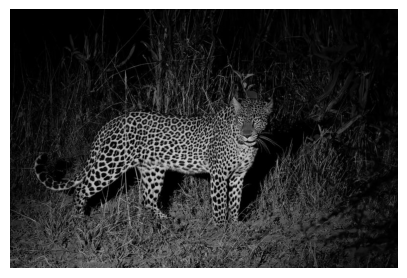

In [3]:
img0 = cv.imread('/content/Africa-Leopard-800w.jpg')
img = cv.cvtColor(img0, cv.COLOR_BGR2GRAY)
print('Image Size is {}'.format(img.shape))
plt.figure(figsize=(5,5))
plt.imshow(img, cmap='gray',vmin=0, vmax=255)
plt.axis('off')
plt.show()

In [4]:
img.dtype

dtype('uint8')

#Q1) a) Downsample the image by factor of 2 using numpy operation. [1 Marks]
#b) Print size of the Downsample image and store it as $inp\_img1$ [1 Marks]  

In [5]:
inp_img1 = img[::2, ::2]
print('Downscaled image is of size{}'.format(inp_img1.shape))

Downscaled image is of size(267, 400)


#Q2) Write a function $Interp(inp\_img1, scale)$ to implement Bilinear Interpolation using numpy operations. This function will take matrix as input and increase the scale of the image by $scale$-times[3 Marks]

In [6]:
def Interp(inp_img1, scale):

    original_height, original_width = inp_img1.shape

    scaled_height, scaled_width = int(original_height * scale), int(original_width * scale)

    x_positions = np.linspace(0, original_width - 1, scaled_width)
    y_positions = np.linspace(0, original_height - 1, scaled_height)
    x_grid, y_grid = np.meshgrid(x_positions, y_positions)

    x_base = np.floor(x_grid).astype(int)
    x_next = np.clip(x_base + 1, 0, original_width - 1)
    y_base = np.floor(y_grid).astype(int)
    y_next = np.clip(y_base + 1, 0, original_height - 1)

    x_fraction = x_grid - x_base
    y_fraction = y_grid - y_base

    top_left = inp_img1[y_base, x_base] * (1 - x_fraction) * (1 - y_fraction)
    top_right = inp_img1[y_base, x_next] * x_fraction * (1 - y_fraction)
    bottom_left = inp_img1[y_next, x_base] * (1 - x_fraction) * y_fraction
    bottom_right = inp_img1[y_next, x_next] * x_fraction * y_fraction


    interpolated_image = top_left + top_right + bottom_left + bottom_right

    return interpolated_image


#Q3) Apply $Interp(.,.)$ with $scale = 2$ on input image. [2 Marks]
#Store output image in $out\_img1$

The dimensions of the resized image are: (534, 800)


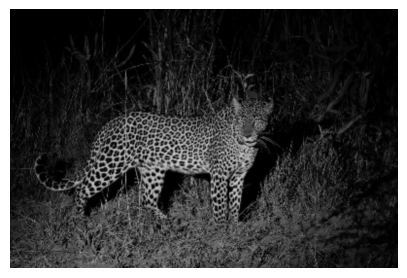

In [7]:
scale = 2
out_img1 = Interp(inp_img1, scale)
print(f'The dimensions of the resized image are: {out_img1.shape}')

plt.figure(figsize=(5, 5))
plt.imshow(out_img1, cmap='gray', vmin=0, vmax=255)
plt.axis('off')
plt.show()


#Show input image and output images.

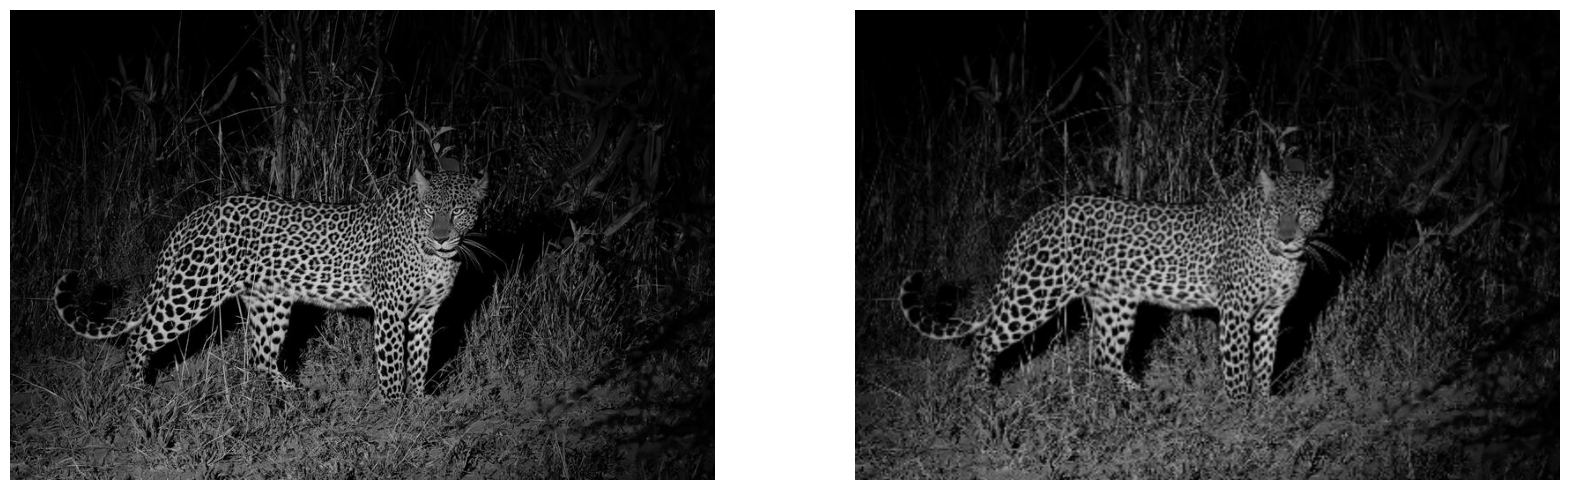

In [8]:
plt.figure(figsize=(20,20))
plt.subplot(121)
plt.imshow(img, cmap='gray', vmin=0, vmax=255)
plt.axis('off')
plt.subplot(122)
plt.imshow(out_img1, cmap='gray', vmin=0, vmax=255)
plt.axis('off')
plt.show()

#Q3) Calculate element-wise mean squared error between $img$ and $out\_img1$ [3 Marks]
[Hint: you will recieve an error related to matrix shape. Add column of zeros to mitigate that error]

In [9]:
adjusted_img = np.zeros_like(out_img1)

adjusted_img[:img.shape[0], :img.shape[1]] = img

mean_squared_error = np.mean((adjusted_img - out_img1) ** 2)

print('The Mean Squared Error (MSE) is:', mean_squared_error)


The Mean Squared Error (MSE) is: 382.46732104093826
